# Step 0: Imports

In [1]:
# === Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import shap

# Go to project root: .../Scrabble
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)  # Add root

from src.utils import create_dataset, find_best_model

# Step 1: Create Training+Validation/Testing sets

In [2]:
# Create new features and build one df to contains X_train_val, y_train_val and X_test 
dataset = create_dataset()

# Filter out rows of testing data (rows with user_rating == 0)
training_examples = dataset[dataset['user_rating'] != 0]

X_train_val = training_examples.drop(columns=['user_rating'])  # Traning + validation features df
y_train_val = training_examples['user_rating']  # Train + validation target vector

# Extract rows of testing data
testing_examples = dataset[dataset['user_rating'] == 0]
X_test = testing_examples.drop(columns=['user_rating']) # Test features df

# Step 2: Find the best model after tuning hyperparameters

In [3]:
best_model, avg_train_rmse, avg_val_rmse = find_best_model(X_train_val, y_train_val)

print(best_model, end='\n')
print(f"RMSE on the training set = {avg_train_rmse:.3f}", end='\n')
print(f"RMSE on the validation set = {avg_val_rmse:.3f}")

print(f"Train RMSE: {avg_train_rmse:.3f}")
print(f"Validation RMSE: {avg_val_rmse:.3f}")

gap = ((avg_val_rmse / avg_train_rmse) - 1) * 100
print(f"Generalization Gap: {gap:.3f}%")

[I 2025-05-03 13:17:38,127] A new study created in memory with name: no-name-0df83ee9-8d35-4031-bb65-6dbbb799c4e5



Optimizing: Random Forest


[I 2025-05-03 13:18:25,654] Trial 0 finished with value: 135.63121091356007 and parameters: {'n_estimators': 250, 'max_depth': 48, 'min_samples_split': 15}. Best is trial 0 with value: 135.63121091356007.
[I 2025-05-03 13:19:30,099] Trial 1 finished with value: 134.67584752763474 and parameters: {'n_estimators': 340, 'max_depth': 12, 'min_samples_split': 4}. Best is trial 1 with value: 134.67584752763474.
[I 2025-05-03 13:20:00,459] Trial 2 finished with value: 135.88986567769865 and parameters: {'n_estimators': 123, 'max_depth': 44, 'min_samples_split': 13}. Best is trial 1 with value: 134.67584752763474.
[I 2025-05-03 13:20:26,421] Trial 3 finished with value: 140.7234494851781 and parameters: {'n_estimators': 383, 'max_depth': 5, 'min_samples_split': 20}. Best is trial 1 with value: 134.67584752763474.
[I 2025-05-03 13:21:54,516] Trial 4 finished with value: 134.777724966935 and parameters: {'n_estimators': 433, 'max_depth': 14, 'min_samples_split': 5}. Best is trial 1 with value: 1

Best score for Random Forest: 134.6758

Best params: {'n_estimators': 340, 'max_depth': 12, 'min_samples_split': 4}

Optimizing: XGBoost


[I 2025-05-03 13:27:51,616] Trial 0 finished with value: 142.13113403320312 and parameters: {'n_estimators': 250, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.7993292420985183}. Best is trial 0 with value: 142.13113403320312.
[I 2025-05-03 13:27:53,764] Trial 1 finished with value: 141.61570739746094 and parameters: {'n_estimators': 162, 'max_depth': 4, 'learning_rate': 0.012184186502221764, 'subsample': 0.9330880728874675}. Best is trial 1 with value: 141.61570739746094.
[I 2025-05-03 13:28:08,067] Trial 2 finished with value: 134.92880249023438 and parameters: {'n_estimators': 341, 'max_depth': 10, 'learning_rate': 0.010725209743171996, 'subsample': 0.9849549260809971}. Best is trial 2 with value: 134.92880249023438.
[I 2025-05-03 13:28:12,810] Trial 3 finished with value: 134.5030975341797 and parameters: {'n_estimators': 433, 'max_depth': 5, 'learning_rate': 0.01855998084649059, 'subsample': 0.5917022549267169}. Best is trial 3 with value: 134.5030975341797.

Best score for XGBoost: 134.3904

Best params: {'n_estimators': 222, 'max_depth': 8, 'learning_rate': 0.04345454109729477, 'subsample': 0.645614570099021}

Optimizing: LightGBM


[I 2025-05-03 13:29:02,462] Trial 0 finished with value: 137.05493571117086 and parameters: {'n_estimators': 250, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'num_leaves': 98}. Best is trial 0 with value: 137.05493571117086.
[I 2025-05-03 13:29:06,119] Trial 1 finished with value: 141.64432684343515 and parameters: {'n_estimators': 162, 'max_depth': 4, 'learning_rate': 0.012184186502221764, 'num_leaves': 133}. Best is trial 0 with value: 137.05493571117086.
[I 2025-05-03 13:58:15,726] Trial 2 finished with value: 134.426827202161 and parameters: {'n_estimators': 341, 'max_depth': 10, 'learning_rate': 0.010725209743171996, 'num_leaves': 147}. Best is trial 2 with value: 134.426827202161.
[I 2025-05-03 13:58:19,762] Trial 3 finished with value: 134.74236740646762 and parameters: {'n_estimators': 433, 'max_depth': 5, 'learning_rate': 0.01855998084649059, 'num_leaves': 44}. Best is trial 2 with value: 134.426827202161.
[I 2025-05-03 13:58:24,139] Trial 4 finished with value: 134.

Best score for LightGBM: 134.1542

Best params: {'n_estimators': 282, 'max_depth': 10, 'learning_rate': 0.019721610970574007, 'num_leaves': 87}
           model  Mean_CV_RMSE
0       LightGBM    134.154189
1        XGBoost    134.390436
2  Random Forest    134.675848
{'Random Forest': Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['avg_word_length',
                                                   'bingo_count',
                                                   'hard_letter_plays',
                                                   'negative_turns_count',
                                                   'pass_count',
                                                   'exchange_count',
                                                   'user_score',
                                                   'avg_extra_po

# Step 3: False Analysis

## 3.1. Evaluate Model Predictions

In [22]:
# Trains the best model
best_model.fit(X_train_val, y_train_val)

# Get predictions
y_pred = best_model.predict(X_train_val)
errors = y_train_val - y_pred
abs_errors = np.abs(errors)

# Add errors to a DataFrame
error_df = X_train_val.copy()
error_df['true'] = y_train_val
error_df['pred'] = y_pred
error_df['abs_error'] = abs_errors
error_df_sorted = error_df.sort_values(by='abs_error', ascending=False)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1332
[LightGBM] [Info] Number of data points in the train set: 50410, number of used features: 14
[LightGBM] [Info] Start training from score 1790.322674


C:\Users\orben\Desktop\Software Projects\Scrabble\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


## 3.2. Analyze Large Errors

In [18]:
# View top 30 worst predictions
error_df_sorted.head(1000)

# Questions to ask:

# What are the biggest errors?

# Are they outliers or common cases?

# Are there patterns among high-error samples?

# What to look for:

# Any unusual or rare combinations of feature values?

# Any data entry errors or inconsistencies?

,avg_word_length,bingo_count,hard_letter_plays,negative_turns_count,pass_count,exchange_count,user_score,avg_extra_points_per_turn,lexicon,bot_score,bot_rating,bot_level,true,pred,abs_error
44187,3.235294,0,1,0,0,0,267,10.529412,CSW21,455,1849,1,2510,1701.444834,808.555166
37752,3.642857,0,2,0,0,0,276,13.714286,CSW21,437,1849,1,2510,1704.485038,805.514962
52714,3.687500,1,0,0,0,0,350,17.250000,CSW21,385,1849,1,2510,1730.699614,779.300386
16523,2.928571,0,2,0,0,0,312,16.571429,CSW21,447,1849,1,2510,1740.139681,769.860319
22939,2.923077,0,3,0,0,0,303,17.615385,CSW21,461,1849,1,2510,1745.886871,764.113129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42477,4.083333,2,2,1,0,1,372,24.000000,CSW21,496,2190,2,1564,1901.008264,337.008264
43827,1.687500,0,0,1,11,0,15,0.437500,CSW21,472,2148,3,1979,1642.007503,336.992497
24948,3.058824,0,2,0,0,1,197,7.823529,CSW21,545,2098,2,1957,1620.032387,336.967613
1011,3.750000,1,3,0,0,2,327,14.437500,CSW21,489,1900,1,2162,1825.132417,336.867583


## 3.3. Visual Diagnosis

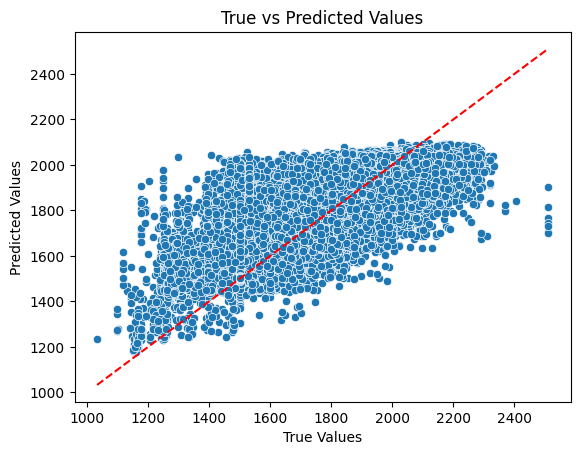

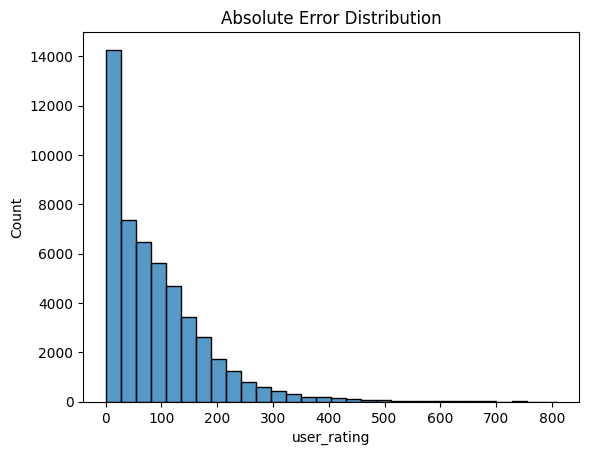

In [19]:
# Objective: Understand what input patterns confuse the model.

# Plot actual vs predicted
sns.scatterplot(x=y_train_val, y=y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.plot([y_train_val.min(), y_train_val.max()], [y_train_val.min(), y_train_val.max()], 'r--')
plt.show()

# Plot error distribution
sns.histplot(abs_errors, bins=30)
plt.title('Absolute Error Distribution')
plt.show()

## 3.4. Investigate Overfitting

In [20]:
print(f"Train RMSE: {avg_train_rmse:.3f}")
print(f"Validation RMSE: {avg_val_rmse:.3f}")

gap = ((avg_val_rmse / avg_train_rmse) - 1) * 100
print(f"Generalization Gap: {gap:.3f}%")

Train RMSE: 123.689
Validation RMSE: 134.154
Generalization Gap: 8.461%


## 3.5. Identify Features That Trick the Model

100%|===================| 50408/50410 [49:03<00:00]        

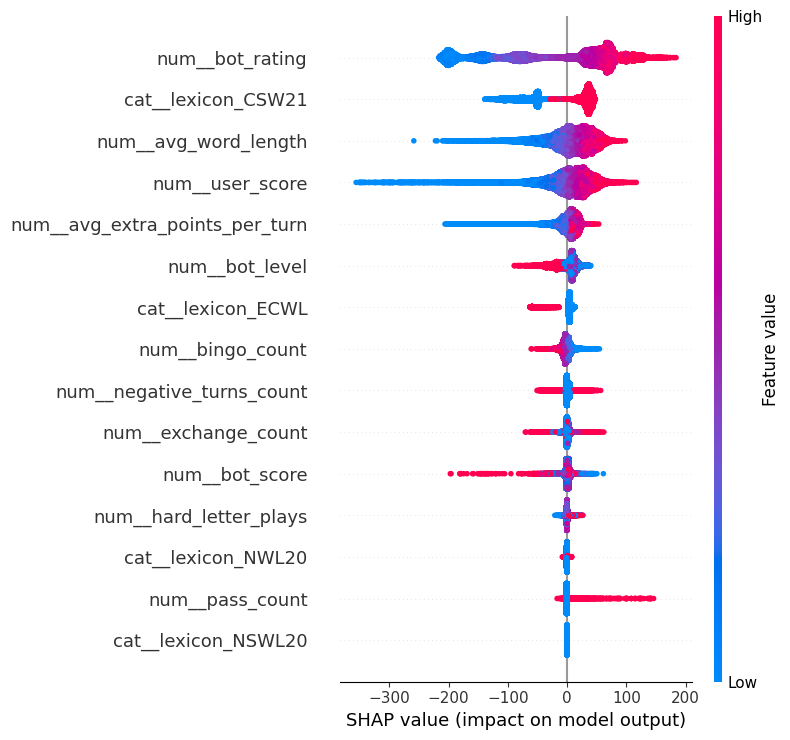

In [23]:
# Step 1: Extract the trained model and transformed data
model = best_model.named_steps['model']
X_transformed = best_model.named_steps['preprocessor'].transform(X_train_val)

# Optional: Get feature names for nicer plots
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

# Step 2: Use SHAP with transformed data
explainer = shap.Explainer(model, X_transformed, feature_names=feature_names)
shap_values = explainer(X_transformed)

# Step 3: Plot the summary
shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)


# Questions to ask:

# Which features dominate predictions?

# Do high-error samples depend on unusual values for these features?